<a href="https://colab.research.google.com/github/ensemble-on/ChatterBot/blob/master/Copy_of_11_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98(%ED%95%9C%EA%B8%80%EB%84%A4%EC%9D%B4%EB%B2%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 다중분류 (한글 네이버)

In [1]:
# 구글 드라이브와 연결
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 경로 설정
naver_dir = '/content/gdrive/My Drive/AIBM/20191016/pytest/네이버뉴스-생활문화_다중/'

In [3]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.0
!pip install rhinoMorph

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages

In [0]:
# Data Loading Preparation
import os

train_dir = os.path.join(naver_dir, 'train')
test_dir = os.path.join(naver_dir, 'test')

label_types = ['건강정보', '공연전시', '도로교통', '여행레저', '음식맛집', '자동차시승기', '종교', '책', '패션뷰티']

In [0]:
# text와 labels 리스트를 만드는 함수를 작성한다
def make_texts_labels(dir, label_types, encode='utf8'):    	# texts와 labels 리스트를 만드는 함수
  texts = []
  labels = []
  
  for label_type in label_types:
    dir_name = os.path.join(dir, label_type) 		  # 각각의 label 폴더에 접근한다
    for fname in os.listdir(dir_name):
      if fname[-4:] == '.txt':                    # 마지막 4 글자가 .txt 로 끝나는지를 확인한다
        f = open(os.path.join(dir_name, fname), encoding=encode)
        texts.append(f.read())                    # 텍스트를 읽어서 texts 리스트에 연결한다
        f.close()
        
        if label_type == label_types[0]:          # 만약 현재 폴더가 '건강정보' 폴더라면
          labels.append(0)                        # texts와 같은 순서의 labels 리스트에는 0을 저장한다
        elif label_type == label_types[1]:
          labels.append(1)
        elif label_type == label_types[2]:
          labels.append(2)
        elif label_type == label_types[3]:
          labels.append(3)
        elif label_type == label_types[4]:
          labels.append(4)
        elif label_type == label_types[5]:
          labels.append(5)
        elif label_type == label_types[6]:
          labels.append(6)
        elif label_type == label_types[7]:
          labels.append(7)
        elif label_type == label_types[8]:
          labels.append(8)
          
  return texts, labels

In [8]:
# Train Data Loading
# 훈련 데이터의 텍스트와 라벨을 받아온다

texts, labels = make_texts_labels(train_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: SK케미칼, 백신 사업 분사 결정 : 네이버 뉴스







글로벌화 단계 진입…올해 백신사업 분사로 별도법인 설립SK케미칼이 주력 사업부문인 백신 사업을 별도 법인으로 분리한다.SK케미칼은 글로벌 프리미엄 백신 회사로 도약을 위해 올해 안에 백신 사업을 분사할 예정이라고 12일 공시했다.SK케미칼은 2006년부터 백신을 미래 성장 동력으로 육성하기 위해 인프라구축에 약 4000억원을 투자했다. 지난 2012년에는 경북 안동에 세포배양 백신 등 차세대 백신을 생산할 수 있는 백신공장 'L하우스'를 짓고 독감백신, 대상포진백신 등을 생산했다. SK케미칼의 사업 부문별 비중을 보면 합성의약품은 약 60%, 백신은 40% 규모다.SK케미칼은 앞으로 분사한 별도법인에 대한 SI(전략적투자자)를 본격적으로 유치하고 기업공개(IPO)를 통해 주주가치 제고에 기여하겠다는 계획이다.SK케미칼 측은 "지속적인 노력의 성과로 사노피 파스퇴르와 차세대폐렴구균 공동개발 계약 체결, 세포배양방식의 독감백신 3·4가 및 대상포진 백신 출시 등 다양한 성과를 창출해 왔다"며 "자체 기술 경쟁력을 바탕으로 글로벌화의 본격화 단계에 진입했다"고 밝혔다.김지섭기자 cloud50@dt.co.kr 디지털타임스 홈페이지 바로가기 / SNS 바로가기디지털타임스 영문뉴스 바로가기 / 카드뉴스 바로가기김지섭
	

texts len: 90
labels 0: 0
labels len: 90


In [9]:
# Analyzing Morpholog
# 한글은 tokenizing을 위해서 먼저 형태소분석을 해야 한다
# 직접 작성

# 한글은 tokenizing을 위해서 먼저 형태소분석을 해야 한다 
import rhinoMorph as rhinoMorph 
rn = rhinoMorph.startRhino()                   

# 리스트 컴프리헨션으로 실질형태소만을 리스트로 가져온다 
texts = [rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in texts]

print(texts[0])

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar


/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


RHINO started!
['SK', '케미칼', '백신', '사업', '분사', '결정', '네이버', '뉴스', '글로벌', '단계', '진입', '올해', '백신', '사업', '분사', '별도', '법인', '설립', 'SK', '케미칼', '주력', '사업', '부문', '백신', '사업', '별도', '법인', '분리하', 'SK', '케미칼', '글로벌', '프리미엄', '백신', '회사', '도약', '위하', '올해', '안', '백신', '사업', '분사하', '예정', '공시하', 'SK', '케미칼', '백신', '미래', '성장', '동력', '육성하', '위하', '인프라', '구축', '약', '투자하', '지나', '경북', '안동', '세포', '배양', '백신', '차세대', '백신', '생산하', '백신', '공장', '하우스', '짓', '독감', '백신', '대상', '포진', '백신', '생산하', 'SK', '케미칼', '사업', '부문', '비중', '보', '합성', '의약품', '약', '백신', '규모', 'SK', '케미칼', '앞', '분사하', '별도', '법인', '대하', '전략', '투자자', '본격', '유치하', '기업', '공개', '통하', '주주', '가치', '제고', '기여하', '계획', 'SK', '케미칼', '지속', '노력', '성과', '사노', '피', '파스퇴르', '차세대', '폐렴', '구균', '공동', '개발', '계약', '체결', '세포', '배양', '방식', '독감', '백신', '가', '및', '대상', '포진', '백신', '출시', '다양하', '성과', '창출하', '자체', '기술', '경쟁력', '바탕', '글로벌', '본격화', '단계', '진입하', '밝히', '김', '지섭', '기자', '디지털', '타임스', '홈페이지', '바로', 'SNS', '바로', '가', '디지털', '타임스', '영문', '뉴스', '바로', '카드', '뉴스'

In [10]:
# Data Tokenizing
# 직접 작성

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
import numpy as np 
import math

validation_ratio = math.floor(len(texts) * 0.3)    # 30%는 검증데이터로 사용한다. 나머지는 훈련데이터 
max_words = 10000                                  # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용한다 
maxlen = 200                                       # 200개 이후의 단어는 버린다 
class_number = 9                                   # 분류할 클래스의 수

tokenizer = Tokenizer(num_words=max_words)         # 상위빈도 10,000 개의 단어만을 추려내는 Tokenizer 객체 생성 
tokenizer.fit_on_texts(texts)                      # 단어 인덱스를 구축한다 
word_index = tokenizer.word_index                  # 단어 인덱스만 가져온다

Using TensorFlow backend.


In [11]:
# Tokenizing 결과 확인
# 전체 데이터가 가지고 있는 토큰의 수를 보여준다. texts_to_sequences()를 거쳐야 10,000개만 남는다. 

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 5495개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'하': 1, '뉴스': 2, '네이버': 3, '및': 4, '이': 5, '기자': 6, '한국': 7, '그': 8, '보': 9, '김': 10, '위하': 11, '되': 12, '주': 13, '서울': 14, '받': 15, '나': 16, '대하': 17, '무단': 18, '전재': 19, '배포': 20, '금지': 21, '설': 22, '고객': 23, '제품': 24, '통하': 25, '올림픽': 26, '에': 27, '등': 28, '평창': 29, '가': 30, '바로': 31, '시장': 32, '작품': 33, '수': 34, '자궁': 35, '대표': 36, '없': 37, '제공': 38, '스포츠서울': 39, '밝히': 40, '서비스': 41, '또': 42, '다양하': 43, '사진': 44, '작가': 45, '계획': 46, '가장': 47, '사람': 48, '약': 49, '때': 50, '이상': 51, '정부': 52, '사회': 53, '교통': 54, '책': 55, '말하': 56, '시': 57, '경제': 58, '오': 59, '한경': 60, '컬러': 61, '사업': 62, '따르': 63, '경우': 64, '제보': 65, '이번': 66, '지역': 67, '교수': 68, '가격': 69, '속': 70, '크': 71, '여성': 72, '공식': 73, '해외': 74, '연휴': 75, '말': 76, '지난해': 77, '공연': 78, '도로': 79, '차': 80, '티': 81, '함께': 82, '핑크': 83, '국가': 84, '채널': 85, '차량': 86, '소설': 87, '문제': 88, '관련': 89, '사량': 90, '많': 91, '기간': 92, '만들': 93, '두': 94, '녹': 95, '항공': 9

In [12]:
# Data Sequencing
# 직접 작성

# train 데이터를 Sequencing 한다 
# 상위 빈도 10,000개의 단어를 word_index의 숫자 리스트로 변환. Tokenizer 결과가 여기서 반영된다 
data = tokenizer.texts_to_sequences(texts) 

# maxlen의 수만큼으로 2D 텐서를 만든다 
data = pad_sequences(data, maxlen=maxlen)

print('data:', data)

data: [[   0    0    0 ...   30   10  511]
 [   0    0    0 ...  317    2   31]
 [   0    0    0 ...   30   10  511]
 ...
 [1767  284 1887 ...    4   20   21]
 [   0    0    0 ...  187 1529  175]
 [   0    0    0 ...    4   20   21]]


In [0]:
# One-Hot-Encoding
# 원-핫 인코딩 함수
def to_one_hot(labels, dimension):
      results = np.zeros((len(labels), dimension))
      for i, label in enumerate(labels):
         results[i, label] = 1.
      return results

# train 데이터에 대하여 원-핫 인코딩을 수행한다
data = to_one_hot(data, dimension=max_words)
labels = to_one_hot(labels, dimension=class_number)

In [14]:
# Train data와 Validation data 준비

print('데이터 텐서의 크기:', data.shape)        	# (90, 10000)
print('레이블 텐서의 크기:', labels.shape)      	# (90, 9) data와 label이 모두 2D 텐서가 되었음

indices = np.arange(data.shape[0])      		      # 0 ~ 89 까지의 숫자를 생성
np.random.shuffle(indices)                        # 0 ~ 89 까지의 숫자를 랜덤하게 섞음
data = data[indices]                              # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음
labels = labels[indices]                          # label도 같은 순서로 섞음

x_train = data[validation_ratio:]                 # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:]               # 훈련데이터의 70%를 훈련데이터 Label
x_val = data[:validation_ratio]                   # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio]                 # 훈련데이터의 30%를 검증데이터 Label

데이터 텐서의 크기: (90, 10000)
레이블 텐서의 크기: (90, 9)


In [15]:
# Model 정의하기
# 직접 작성
from keras import models 
from keras import layers

model = models.Sequential()     # 모델을 새로 정의

# 첫 번째 은닉층. 은닉 노드 64개, 활성화 함수는 음수를 0으로 만드는 relu 함수 사용. 입력층은 10,000 개의 단어가 오므로, input_shape=10,000 
model.add(layers.Dense(64, activation='relu', input_shape=(max_words,)))

# 두 번째 은닉층 
model.add(layers.Dense(32, activation='relu'))

# 출력층. 출력 노드는 분류 개수인 9. 활성화 함수는 sigmoid와 성격이 같으나 다중분류에 사용되는 함수인 softmax 함수를 사용한다. 확률값을 출력 
model.add(layers.Dense(class_number, activation='softmax'))

In [16]:
# 모델 요약 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 297       
Total params: 642,441
Trainable params: 642,441
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile Model
# 가중치 업데이트는 이동평균 방법인 RMSprop을 사용하였다.
# 신경망의 출력이 확률이므로 crossentropy를 사용하는 것이 최선이다
# crossentropy는 원본의 확률 분포와 예측의 확률 분포를 측정하여 조절해 간다
# 또한 다중 분류이므로 categorical_crossentropy를 사용한다
# 직접 작성
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [18]:
# Train Model
# 32개씩 미니 배치를 만들어 10번의 epoch로 훈련
# 훈련데이터로 훈련하고, 검증데이터로 검증한다
# 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

history_dict = history.history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 63 samples, validate on 27 samples
Epoch 1/10





63/63 [==============================] - 1s 16ms/step - loss: 2.1906 - acc: 0.1111 - val_loss: 2.1759 - val_acc: 0.1481
Epoch 2/10
63/63 [==============================] - 0s 845us/step - loss: 1.6972 - acc: 0.7460 - val_loss: 2.1624 - val_acc: 0.1111
Epoch 3/10
63/63 [==============================] - 0s 645us/step - loss: 1.2824 - acc: 0.8571 - val_loss: 2.1213 - val_acc: 0.3333
Epoch 4/10
63/63 [==============================] - 0s 678us/step - loss: 0.9545 - acc: 0.9524 - val_loss: 2.0668 - val_acc: 0.3704
Epoch 5/10
63/63 [==============================] - 0s 742us/step - loss: 0.7183 - acc: 0.9841 - val_loss: 2.0382 - val_acc: 0.3704
Epoch 6/10
63/63 [==============================] - 0s 705us/step - loss: 0.5427 - acc: 1.0000 - val_loss: 2.0227 - val_acc: 0.4074
Epoch 7/10
63/63 [==============================] - 0s 692us/st

In [19]:
# 경로 변경
cd /content/gdrive/My Drive/AIBM/20191016/pytest/

/content/gdrive/My Drive/AIBM/20191016/pytest


In [0]:
# Savel Model
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다
model.save('text_multi_model.h5') 	     # 모델 저장

# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open('text_multi_tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
# Accuracy and Loss 확인
# 직접 작성

# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다 
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc) # [0.1587301558918423, 0.8253968121513487, 0.9365079365079365, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.11111110827279469, 0.7460317498161679, 0.8571428438973805, 0.9523809533270579, 0.9841269841269841, 1.0, 1.0, 1.0, 1.0, 1.0]


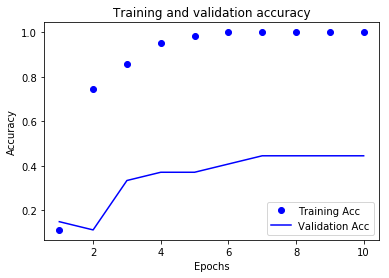

In [23]:
# Plotting Accuracy
# 직접 작성

# 정확도와 손실값의 변화를 보고, epoch를 어디에서 조절해야 할 지를 가늠한다. 
# 정확도가 떨어지는 구간, 손실값이 높게 나타나는 구간을 확인한다 
# 데이터가 큰 경우 대개 epoch를 늘려야 최적값에 도달한다 
import matplotlib.pyplot as plt

# 정확도 그리기 
plt.plot(epochs, acc, 'bo', label='Training Acc') 
plt.plot(epochs, val_acc, 'b', label='Validation Acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()     

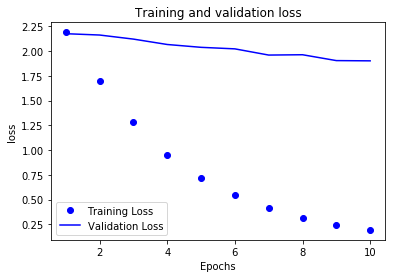

In [24]:
# Plotting Loss
plt.figure()            		# 새로운 그림을 그린다

# 손실값 그리기
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()            		

plt.show()

In [25]:
# Load Model
import os
from keras.models import load_model

filepath = '/content/gdrive/My Drive/AIBM/20191016/pytest/'
os.chdir(filepath)
print("Current Directory:", os.getcwd())

loaded_model = load_model('text_multi_model.h5')
print("model loaded:", loaded_model)

with open('text_multi_tokenizer.pickle', 'rb') as handle:
       loaded_tokenizer = pickle.load(handle)

Current Directory: /content/gdrive/My Drive/AIBM/20191016/pytest
model loaded: <keras.engine.sequential.Sequential object at 0x7f9aad2cee48>


In [26]:
# Test Data Loading
# 테스트 데이터의 텍스트와 라벨을 받아온다
texts, labels = make_texts_labels(test_dir, label_types)

print('texts 0:', texts[0])
print('texts len:', len(texts))
print('labels 0:', labels[0])
print('labels len:', len(labels))

texts 0: ﻿나이 들어 아픈 허리 척추관협착증, 좁아진 신경통로 넓혀야 해결 가능

척추 내 신경이 지나가는 통로가 좁아지는 척추관협착증은 대표적인 퇴행성 척추 질환으로, 60대 이후 나이 들어서 생긴 허리 통증은 척추협착증일 확률이 상당히 높다. 나이가 들면 노화현상으로 인해 누구에게나 척추관이 좁아지는 증세가 찾아오기 때문이다. 건강보험심사평가원 통계에 따르면 척추관협착증 환자 수는 2014년 128만 3861명에서 2017년 154만 3477명으로 4년간 20% 이상 증가한 것으로 나타났다. 척추관협착증 환자들은 유독 다리의 통증을 호소한다. 걸을 때 다리가 터질 듯한 통증으로 가다 서다를 반복하거나 허리를 굽히거나 앉으면 통증이 줄어드는 증상이 있다면 척추관협착증일 수 있다.

부평힘찬병원 박진규 원장(신경외과 전문의)은 “척추관협착증은 척추 중앙의 척추관, 신경근관 또는 추간공이 좁아져 어느 부분이 협착되느냐에 따라 추간공협착증, 신경공협착증 등으로 세분화되기도 한다”며 “척추관이 연결된 목부터 꼬리뼈까지 어디에서든 발생할 수 있는데 대개 한 곳에서만 발생하기보다는 여러 곳에서 동시에 발생한다”고 설명했다.

척추관협착증은 허리를 구부릴 수 있는 척추 관절과 척추를 잡아주는 인대가 두꺼워지면서 신경관이 좁아져 다리로 가는 신경을 누르며 발생하는 질환이다. 초기 단계라면 선택적 주사요법, 물리치료와 운동치료 등을 통한 보존적 치료로 효과를 얻을 수 있다. 꽤 좁아진 경우에는 추간공 협착증 풍선확장술을 시행할 수도 있다. 국소 마취하에 척추의 꼬리뼈 쪽으로 풍선이 달린 가느다란 특수 카테터를 삽입, 카테터 관에 약물을 주입해 풍선을 부풀려 척추관을 넓히는 시술이다.

수술이 유일한 치료 방법일 경우도 있다. 통증이 심해 허리를 제대로 펴지 못하고, 5분 이상 걷기 힘들 때, 물리치료나 약물치료, 비수술 주사치료에도 더 이상 효과를 거둘 수 없을 때, 허리디스크와 동반되어 신경학적 결함이 뚜렷할 때 수술을 시행하게 된다. 수술은 척추관을 압박하는 요인

In [27]:
# Data Sequencing
# 직접 작성

# 로딩된 tokenizer로 test 데이터를 Sequencing 한다 
data = loaded_tokenizer.texts_to_sequences(texts) # 문자열을 숫자 리스트로 변환 
data = pad_sequences(data, maxlen=maxlen) # maxlen의 수만큼으로 2D 텐서를 만듦 
print('data:', data)

# test 데이터를 원-핫 인코딩한다. 라벨에 대하여도 원-핫 인코딩을 수행한다. 분류가 총 9종이므로 dimension을 9로 준다. 
x_test = to_one_hot(data, dimension=max_words) 
y_test = to_one_hot(labels, dimension=class_number)

data: [[   0    0    0 ...    2    4   21]
 [   0    0    0 ...  753  173    6]
 [   0    0    0 ...   34 4967 2511]
 ...
 [   0    0    0 ...  493   82    6]
 [   0    0    0 ...  385  533    6]
 [   0    0    0 ...  848   34  747]]


In [28]:
# Test Data Evaluation
# 직접 작성
# 원-핫 인코딩을 한 테스트데이터의 텍스트와 라벨을 입력한다 
test_eval = loaded_model.evaluate(x_test, y_test) 
print('prediction model loss & acc:', test_eval) # 최대 44.4% 까지 나왔다

27/27 [==============================] - 0s 2ms/step
prediction model loss & acc: [2.048892021179199, 0.4444444477558136]


In [29]:
# 예측값 확인
predictions = loaded_model.predict(x_test)
print('predictions shape:', predictions.shape)
print('prediction 0 shape:', predictions[0].shape)
print('prediction 0 sum', np.sum(predictions[0]))             # 모든 분류에 대한 확률의 총합은 1이 되어야 한다

print('prediction 0 value:', predictions[0])                  # 9개 분류 각각에 대한 확률값
print('prediction 0 max value:', np.argmax(predictions[0]))  	# prediction 0이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 1 max value:', np.argmax(predictions[1]))   # prediction 1이 가지고 있는 가장 큰 값의 판정 결과
print('prediction 2 max value:', np.argmax(predictions[2]))   # prediction 2가 가지고 있는 가장 큰 값의 판정 결과

predictions shape: (27, 9)
prediction 0 shape: (9,)
prediction 0 sum 0.99999994
prediction 0 value: [0.12643823 0.12854964 0.11819538 0.10372235 0.04723294 0.10132951
 0.12048323 0.13815686 0.11589177]
prediction 0 max value: 7
prediction 1 max value: 0
prediction 2 max value: 7


In [30]:
# 1개 데이터 예측
text = ["안녕하세요, 이것은 테스트 문장입니다."]       	# list 타입으로 만든다

text=[rhinoMorph.onlyMorph_list(rn, sentence, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=False) for sentence in text]
print('형태소 분석 결과:', text)

data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)

predictions = loaded_model.predict(x_test)
print("Result:", predictions)                           # 각 분류에 대한 확률을 보여준다
print("분류 결과:", np.argmax(predictions[0]))         	# 가장 큰 확률값을 가진 분류 제시. 0~8 숫자 중 하나

형태소 분석 결과: [['안녕하', '이것', '테스트', '문장']]
Result: [[0.10670335 0.11347177 0.11294255 0.12069344 0.1023092  0.09875957
  0.11988797 0.11285742 0.11237475]]
분류 결과: 3
